In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# below a sample of the iris dataset [length, width, "blue" if 0 | "red" if 1)
data = [[3,   1.5, 1], 
        [2,   1,   0], 
        [4,   1.5, 1], 
        [3,   1,   0], 
        [3.5, .5,  1], 
        [2,   .5,  0], 
        [5.5,  1,  1], 
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [4]:
data[0]

[3, 1.5, 1]

In [5]:
data[0][0]

3

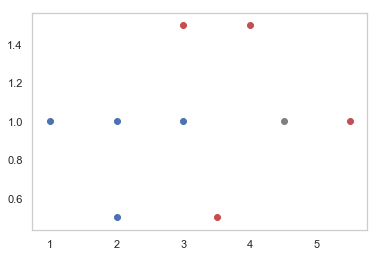

In [6]:
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

In [7]:
def sigmoid(x): # sigmoid is useful for binary predictions
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

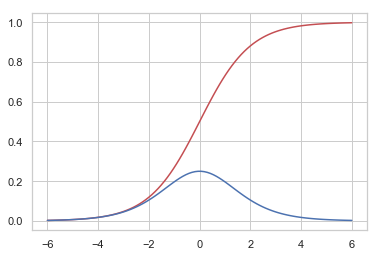

In [8]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

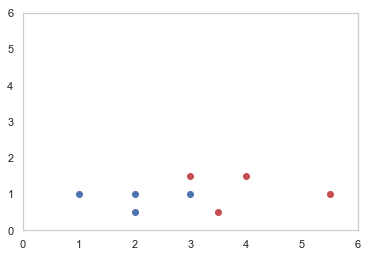

In [9]:
# scatter data

plt.axis([0, 6, 0, 6])
plt.grid()

for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:  #index 2 shows the color of the flower
        color = "b"
    plt.scatter(point[0], point[1], c=color)

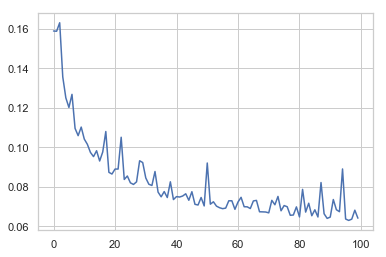

In [10]:
# training loop

def train(iterations, learning_rate): # larger learning rate is faster, but smaller is more precise
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()

    costs = [] # store costs for minimalization

    for i in range(iterations):
        ri = np.random.randint(len(data)) # selecting a random flower a 1000 times
        point = data[ri]

        z = point[0] * w1 + point[1] * w2 + b # weighted average of the points features and the bias
        pred = sigmoid(z)

        target = point[2]
        cost = np.square(pred - target) # squared errors (cost for current flower)

        if i % 100 == 0:  # update the cost once every 100 iterations. For a more readable graph.
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c/(len(data))) # append mean squared errors for plot interpretation

        dcost_pred = 2 * (pred - target) # taking the derivatives
        dpred_dz = sigmoid_p(z)

        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1

        dcost_dz = dcost_pred * dpred_dz

        dcost_dw1 = dcost_dz * dz_dw1  # chain rule
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1 # updating the weights every iteration by substracting the cost derivative.
        w2 = w2 - learning_rate * dcost_dw2 # weights move toward cost minimum with every iteration
        b = b - learning_rate * dcost_db

    return costs, w1, w2, b

costs, w1, w2, b = train(10000, 0.1)

plt.plot(costs) # costs down to 0.1

In [11]:
for i in range(len(data)): # for all flowers, make a prediction
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.6558696851859489
[2, 1, 0]
pred: 0.08421878756962282
[4, 1.5, 1]
pred: 0.963008678822034
[3, 1, 0]
pred: 0.5567735848849822
[3.5, 0.5, 1]
pred: 0.753697910418214
[2, 0.5, 0]
pred: 0.057150246577714094
[5.5, 1, 1]
pred: 0.9988469274851605
[1, 1, 0]
pred: 0.006687555506833723


As we can see, the model predicts most flowers correctly, but struggles with petal length 3. In the graph below we can see that this is a border case.

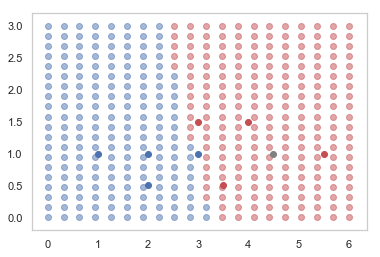

In [12]:
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.5)

vis_data()

Now we can see if our model can predict the mystery flower.

In [13]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
print(mystery_flower)
print(pred)

[4.5, 1]
0.9844761789976735


Our model has predicted that the color of the mystery flower must be red.
We can fill in any values in the predict_flower function below to let the model make a prediction.

In [14]:
def predict_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        print("blue, with " + str((1 - round(pred, 2))*100) + "% certainty")
    else:
        print("red, with " + str(round(pred, 2)*100) + "% certainty")

In [15]:
predict_flower(5,5)
predict_flower(1000,0)
predict_flower(2, 2.5)
predict_flower(1,.5)

red, with 100.0% certainty
red, with 100.0% certainty
blue, with 76.0% certainty
blue, with 100.0% certainty


Now that we have a model to predict flower color based on petal length and width, we can take it a step further and import the full iris dataset, which contains more variables and 3 types of flowers.

In [16]:
iris = pd.read_csv('iris.csv')

In [17]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [18]:
iris = iris.drop("Unnamed: 0", axis=1) # dropping empty column
iris.rename(columns={'Sepal.Length':'Sepal_Length','Sepal.Width':'Sepal_Width','Petal.Length':'Petal_Length','Petal.Width':'Petal_Width'}, inplace=True) # removing '.' from column names
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We are going to build a model which can predict whether a flower is setosa or not. For this project, we are limiting ourselves to a binary outcome.

In [19]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


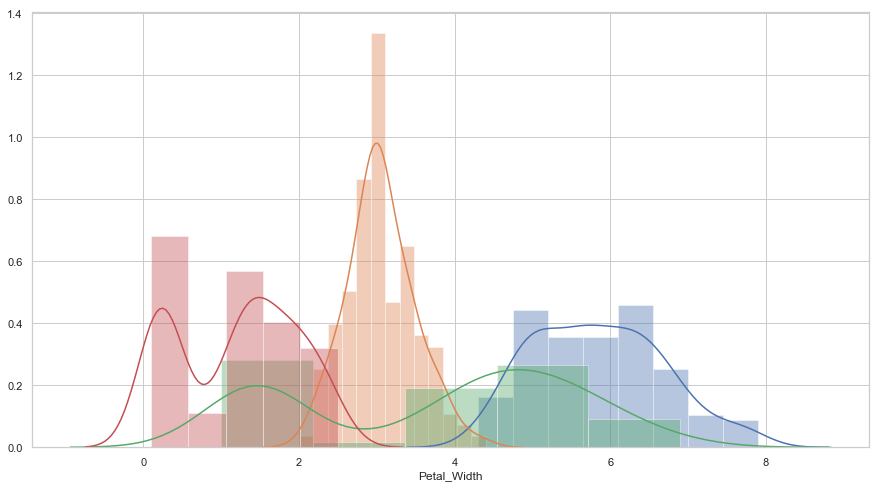

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(iris["Sepal_Length"])
sns.distplot(iris["Sepal_Width"])
sns.distplot(iris["Petal_Length"])
sns.distplot(iris["Petal_Width"])

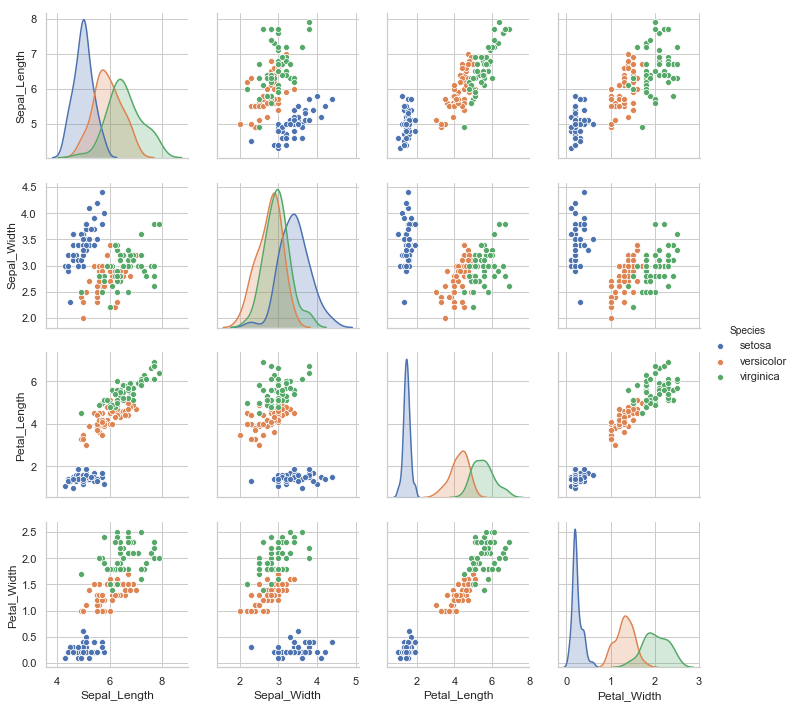

In [21]:
sns.pairplot(iris, hue="Species")

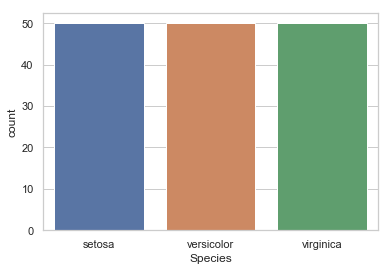

In [22]:
sns.countplot(x="Species", data=iris)

In [23]:
# overwriting Species column with replaced value of 1 for 'setosa' and 0 for the other two flowers.
iris["Species"]= iris["Species"].replace("setosa", 1)
iris["Species"]= iris["Species"].replace("versicolor", 0)
iris["Species"]= iris["Species"].replace("virginica", 0)

In [24]:
# turning the dataframe into a numpy array for training purposes
iris = np.asarray(iris)

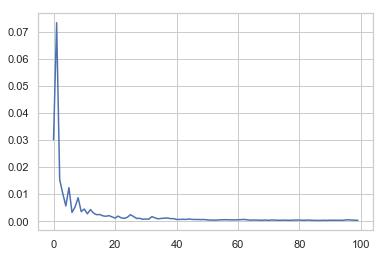

In [25]:
# training loop
def train2(iterations, learning_rate): # larger learning rate is faster, but smaller is more precise
    w1 = np.random.randn()
    w2 = np.random.randn()
    w3 = np.random.randn()
    w4 = np.random.randn()
    b = np.random.randn()

    costs = [] # store costs for minimalization

    for i in range(iterations):
        ri = np.random.randint(len(iris)) # selecting a random flower a 1000 times
        point = iris[ri]

        z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b # weighted average of the points features and the bias
        pred = sigmoid(z)

        target = point[4]
        cost = np.square(pred - target) # squared errors (cost for current flower)

        if i % 100 == 0:  # update the cost once every 100 iterations. For a more readable graph.
            c = 0
            for j in range(len(data)):
                p = iris[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + w3 * p[2] + w4 * p[3] + b)
                c += np.square(p_pred - p[4])
            costs.append(c/(len(data))) # append mean squared errors for plot interpretation

        dcost_pred = 2 * (pred - target) # taking the derivatives
        dpred_dz = sigmoid_p(z)

        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_dw3 = point[2]
        dz_dw4 = point[3]
        dz_db = 1

        dcost_dz = dcost_pred * dpred_dz

        dcost_dw1 = dcost_dz * dz_dw1  # chain rule
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_dw3 = dcost_dz * dz_dw3
        dcost_dw4 = dcost_dz * dz_dw4
        dcost_db = dcost_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1 # updating the weights every iteration by substracting the cost derivative.
        w2 = w2 - learning_rate * dcost_dw2 # weights move toward cost minimum with every iteration
        w3 = w3 - learning_rate * dcost_dw3
        w4 = w4 - learning_rate * dcost_dw4
        b = b - learning_rate * dcost_db

    return costs, w1, w2, w3, w4, b

costs, w1, w2, w3, w4, b = train2(10000, 0.1)

plt.plot(costs) # costs down to 0.1

In [26]:
for i in range(len(iris)): # for all flowers, make a prediction
    point = iris[i]
    print(point[4])
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

1.0
pred: 0.9899336025155402
1.0
pred: 0.980599411743804
1.0
pred: 0.9860109620255855
1.0
pred: 0.9711056632986544
1.0
pred: 0.9901882871402751
1.0
pred: 0.9835398243006731
1.0
pred: 0.9812048285854478
1.0
pred: 0.9841498226310473
1.0
pred: 0.9688535562864996
1.0
pred: 0.9800109309716918
1.0
pred: 0.991357687773672
1.0
pred: 0.9757465312967774
1.0
pred: 0.9819088061460333
1.0
pred: 0.9884950010545608
1.0
pred: 0.9979716694144644
1.0
pred: 0.9954764082442188
1.0
pred: 0.9945856818667492
1.0
pred: 0.9883488228589881
1.0
pred: 0.9874490119843665
1.0
pred: 0.9886519230826123
1.0
pred: 0.9796365680166481
1.0
pred: 0.9854715327621411
1.0
pred: 0.9956404064068177
1.0
pred: 0.9568003419384643
1.0
pred: 0.9454397426429139
1.0
pred: 0.9688689038223182
1.0
pred: 0.9721375714591458
1.0
pred: 0.9876815563553955
1.0
pred: 0.9896723759416686
1.0
pred: 0.9681112792051803
1.0
pred: 0.9673024604345284
1.0
pred: 0.9843168418635653
1.0
pred: 0.9942164245231265
1.0
pred: 0.9963600975029906
1.0
pred: 0.9769

Scrolling through the list, we can see that predictions are pretty accurate. Using the function below, we can fill in our own values for testing purposes.

In [27]:
def predict_flower2(Sepal_Length, Sepal_Width, Petal_Length, Petal_Width):
    z = Sepal_Length * w1 + Sepal_Width * w2 + Petal_Length * w3 + Petal_Width * w4 + b
    pred = sigmoid(z)
    if pred < .5:
        print("This is NOT a Setosa flower, with " + str((1 - round(pred, 2))*100) + "% certainty")
    else:
        print("This IS a Setosa flower, with " + str(round(pred, 2)*100) + "% certainty")
    
predict_flower2(5,5,5,5)
predict_flower2(1000,0,1,3)
predict_flower2(2,2.5,1.5,5)
predict_flower2(1,.5,3,2)

This is NOT a Setosa flower, with 100.0% certainty
This IS a Setosa flower, with 100.0% certainty
This is NOT a Setosa flower, with 100.0% certainty
This is NOT a Setosa flower, with 100.0% certainty


For a follow-up project, a model which can predict non-binary outcomes can be interesting. For this, we could use Keras or skflow.